In [12]:
import pandas as pd
import warnings
import plotly.express as px
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
athletes_df = pd.read_csv('../clean_data/data/output/athletes.csv')
hosts_df = pd.read_csv('../clean_data/data/output/hosts.csv')
results_df = pd.read_csv('../clean_data/data/output/results_jo.csv')

In [14]:
hosts_df.isnull().sum()

game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [15]:
hosts_df.head(10)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
6,vancouver-2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z,Canada,Vancouver 2010,Winter,2010
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
8,turin-2006,2006-02-26T19:00:00Z,2006-02-10T07:00:00Z,Italy,Turin 2006,Winter,2006
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004


In [16]:
jo_types = hosts_df[['game_slug', 'game_season', 'game_year', 'game_end_date', 'game_start_date']]
jo_types.head(10)

,game_slug,game_season,game_year,game_end_date,game_start_date
0,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
1,tokyo-2020,Summer,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
2,pyeongchang-2018,Winter,2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z
3,rio-2016,Summer,2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z
4,sochi-2014,Winter,2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z
5,london-2012,Summer,2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z
6,vancouver-2010,Winter,2010,2010-02-28T04:00:00Z,2010-02-12T16:00:00Z
7,beijing-2008,Summer,2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z
8,turin-2006,Winter,2006,2006-02-26T19:00:00Z,2006-02-10T07:00:00Z
9,athens-2004,Summer,2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z


In [17]:
results_df.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,Mixed
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,Mixed
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,Mixed
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,Mixed
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,Mixed
5,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Zuzana HAJKOVA', 'https://olympics.com/en/a...",False,6,Czech Republic,CZ,CZE,NaN,NaN,Mixed
6,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jenny PERRET', 'https://olympics.com/en/ath...",False,7,Switzerland,CH,SUI,NaN,NaN,Mixed
7,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Vicky PERSINGER', 'https://olympics.com/en/...",False,8,United States of America,US,USA,NaN,NaN,Mixed
8,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Suyuan FAN', 'https://olympics.com/en/athle...",False,9,People's Republic of China,CN,CHN,NaN,NaN,Mixed
9,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Tahli GILL', 'https://olympics.com/en/athle...",False,10,Australia,AU,AUS,NaN,NaN,Mixed


In [18]:
hosts_results_merge = results_df.merge(jo_types, left_on='slug_game', right_on="game_slug")
hosts_results_merge.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_season,game_year,game_end_date,game_start_date
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
5,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Zuzana HAJKOVA', 'https://olympics.com/en/a...",False,6,Czech Republic,CZ,CZE,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
6,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jenny PERRET', 'https://olympics.com/en/ath...",False,7,Switzerland,CH,SUI,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
7,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Vicky PERSINGER', 'https://olympics.com/en/...",False,8,United States of America,US,USA,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
8,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Suyuan FAN', 'https://olympics.com/en/athle...",False,9,People's Republic of China,CN,CHN,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z
9,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Tahli GILL', 'https://olympics.com/en/athle...",False,10,Australia,AU,AUS,NaN,NaN,Mixed,beijing-2022,Winter,2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z


In [19]:
hosts_results_merge.game_season.unique()

array(['Winter', 'Summer'], dtype=object)

In [20]:
summer_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Summer')].copy()
winter_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Winter')].copy()

In [21]:
summer_games_results.drop(['game_season'], axis=1, inplace=True)
summer_games_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date
3784,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,ESP,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3785,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,SMR,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3786,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,USA,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3787,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,SVK,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z
3788,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,NaN,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,JPN,NaN,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z


In [22]:
summer_games_results.isnull().sum()

discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               101672
athletes                  10586
rank_equal                90721
rank_position              3858
country_name                  0
country_code               3555
country_3_letter_code         0
value_unit                68966
value_type                61920
event_gender                  0
game_slug                     0
game_year                     0
game_end_date                 0
game_start_date               0
dtype: int64

In [23]:
# summer_games_results.drop_duplicates(inplace=True)
# summer_games_results.duplicated().sum()

dopplers = summer_games_results.loc[(summer_games_results.duplicated())]
dopplers

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,value_unit,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date
154361,Water Polo,Water Polo Women,antwerp-1920,GameTeam,NaN,NaN,NaN,1,Netherlands,NL,NED,2,SCORE,Women,antwerp-1920,1920,1920-09-12T19:00:00Z,1920-04-20T07:00:00Z
155336,Sailing,8m mixed,stockholm-1912,GameTeam,NaN,NaN,NaN,5,Russian Federation,RU,RUS,0,POINTS,Mixed,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157014,Shooting,trap 125 targets men,stockholm-1912,Athlete,GOLD,"[('Jay Graham', nan)]",NaN,1,United States of America,US,USA,96,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157015,Shooting,trap 125 targets men,stockholm-1912,Athlete,SILVER,"[('Alfred GOELDEL', 'https://olympics.com/en/a...",NaN,2,Germany,DE,GER,94,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
157016,Shooting,trap 125 targets men,stockholm-1912,Athlete,BRONZE,"[('Harry Blaus', nan)]",NaN,3,Russian Federation,RU,RUS,91,POINTS,Men,stockholm-1912,1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161736,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161737,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161738,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z
161739,Sailing,Â½-1 Ton Race Two Open,paris-1900,GameTeam,NaN,"[('LETOT LETOT', 'https://olympics.com/en/athl...",NaN,DNF,France,FR,FRA,NaN,IRM,Men,paris-1900,1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z


In [24]:
summer_games_results.medal_type.unique()

array(['GOLD', 'SILVER', 'BRONZE', nan], dtype=object)

In [25]:
summer_games_results['medal_type'] = summer_games_results['medal_type'].fillna('None')

In [26]:
summer_games_results['total_medals'] = summer_games_results['medal_type'].apply(lambda x: 0 if x == 'None' else 1)
summer_games_results['gold_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'GOLD' else 0)
summer_games_results['silver_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'SILVER' else 0)
summer_games_results['bronze_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'BRONZE' else 0)
summer_games_results.head(10)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,value_type,event_gender,game_slug,game_year,game_end_date,game_start_date,total_medals,gold_medals,silver_medals,bronze_medals
3784,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,1,0,0
3785,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,0,1,0
3786,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,1,0,0,1
3787,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",False,4,Slovakia,SK,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3788,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",False,5,Japan,JP,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3789,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Penny SMITH', 'https://olympics.com/en/athl...",False,6,Australia,AU,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3790,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Laetisha SCANLAN', 'https://olympics.com/en...",False,7,Australia,AU,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3791,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Jana SPOTAKOVA', 'https://olympics.com/en/a...",False,8,Slovakia,SK,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3792,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Xiaojing WANG', 'https://olympics.com/en/at...",False,9,People's Republic of China,CN,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0
3793,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,None,"[('Kirsty HEGARTY', 'https://olympics.com/en/a...",False,10,Great Britain,GB,...,NaN,Mixed,tokyo-2020,2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,0,0,0,0


In [27]:
historic_medalsbycountry = summer_games_results.groupby(['game_year','country_name']).agg({'total_medals':'sum', 'gold_medals':'sum', 'silver_medals':'sum','bronze_medals':'sum'})
historic_medalsbycountry.head(10)

total_medals  gold_medals  silver_medals  \
game_year country_name                                              
1896      Australia                 2            2              0   
          Austria                   5            2              1   
          Chile                     0            0              0   
          Denmark                   6            1              2   
          France                   11            5              4   
          Germany                  13            6              5   
          Great Britain             7            2              3   
          Greece                   47           10             18   
          Hungary                   6            2              1   
          Italy                     0            0              0   

                         bronze_medals  
game_year country_name                  
1896      Australia                  0  
          Austria                    2  
          Chile                      0  
          Denmark                    3  
          France                     2  
          Germany                    2  
          Great Britain              2  
          Greece                    19  
          Hungary                    3  
          Italy                      0

In [28]:
historic_medalsbycountry = historic_medalsbycountry.sort_values(by=['game_year','total_medals'],ascending=[True, False])
historic_medalsbycountry.head(10)

total_medals  gold_medals  silver_medals  \
game_year country_name                                                         
1896      Greece                              47           10             18   
          United States of America            20           11              7   
          Germany                             13            6              5   
          France                              11            5              4   
          Great Britain                        7            2              3   
          Denmark                              6            1              2   
          Hungary                              6            2              1   
          Austria                              5            2              1   
          Switzerland                          3            1              2   
          Australia                            2            2              0   

                                    bronze_medals  
game_year country_name                             
1896      Greece                               19  
          United States of America              2  
          Germany                               2  
          France                                2  
          Great Britain                         2  
          Denmark                               3  
          Hungary                               3  
          Austria                               2  
          Switzerland                           0  
          Australia                             0

In [29]:
historic_sportsbycountry = summer_games_results.groupby(['game_year','country_name','discipline_title']).count()
historic_sportsbycountry.head(10)

event_title  slug_game  \
game_year country_name discipline_title                              
1896      Australia    Athletics                      3          3   
                       Tennis                         1          1   
          Austria      Cycling Track                  4          4   
                       Fencing                        1          1   
                       Swimming                       4          4   
          Chile        Athletics                      2          2   
          Denmark      Athletics                      5          5   
                       Fencing                        1          1   
                       Gymnastics Artistic            1          1   
                       Shooting                       7          7   

                                            participant_type  medal_type  \
game_year country_name discipline_title                                    
1896      Australia    Athletics                           3           3   
                       Tennis                              1           1   
          Austria      Cycling Track                       4           4   
                       Fencing                             1           1   
                       Swimming                            4           4   
          Chile        Athletics                           2           2   
          Denmark      Athletics                           5           5   
                       Fencing                             1           1   
                       Gymnastics Artistic                 1           1   
                       Shooting                            7           7   

                                            athletes  rank_equal  \
game_year country_name discipline_title                            
1896      Australia    Athletics                   3           0   
                       Tennis                      1           1   
          Austria      Cycling Track               4           0   
                       Fencing                     1           0   
                       Swimming                    4           0   
          Chile        Athletics                   2           0   
          Denmark      Athletics                   5           0   
                       Fencing                     1           0   
                       Gymnastics Artistic         1           0   
                       Shooting                    7           1   

                                            rank_position  country_code  \
game_year country_name discipline_title                                   
1896      Australia    Athletics                        3             3   
                       Tennis                           1             1   
          Austria      Cycling Track                    4             4   
                       Fencing                          1             1   
                       Swimming                         4             4   
          Chile        Athletics                        2             2   
          Denmark      Athletics                        3             5   
                       Fencing                          1             1   
                       Gymnastics Artistic              1             1   
                       Shooting                         7             7   

                                            country_3_letter_code  value_unit  \
game_year country_name discipline_title                                         
1896      Australia    Athletics                                3           2   
                       Tennis                                   1           0   
          Austria      Cycling Track                            4           2   
                       Fencing                                  1           0   
                       Swimming                                 4           2   
     

In [30]:
historic_sportsbycountry = historic_sportsbycountry[['event_title']].reset_index()
historic_sportsbycountry = historic_sportsbycountry.rename({'discipline_title':'sports', 'event_title':'epreuves'},axis=1)
historic_sportsbycountry

,game_year,country_name,sports,epreuves
0,1896,Australia,Athletics,3
1,1896,Australia,Tennis,1
2,1896,Austria,Cycling Track,4
3,1896,Austria,Fencing,1
4,1896,Austria,Swimming,4
...,...,...,...,...
23451,2020,Zambia,Boxing,3
23452,2020,Zambia,Football,1
23453,2020,Zambia,Judo,1
23454,2020,Zimbabwe,Golf,1


In [31]:
historic_sportsbycountry = historic_sportsbycountry.groupby(['game_year','country_name']).agg({'sports':'count'})
historic_sportsbycountry

sports
game_year country_name                   
1896      Australia                     2
          Austria                       3
          Chile                         1
          Denmark                       6
          France                        7
...                                   ...
2020      Virgin Islands, British       1
          Virgin Islands, US            1
          Yemen                         2
          Zambia                        3
          Zimbabwe                      2

[2889 rows x 1 columns]

In [32]:
historic_epreuvesbycountry = summer_games_results.groupby(['game_year','country_name','event_title']).count()
historic_epreuvesbycountry

discipline_title  \
game_year country_name event_title                                      
1896      Australia    1500m men                                    1   
                       800m men                                     1   
                       Singles men                                  1   
                       marathon men                                 1   
          Austria      100km men                                    1   
...                                                               ...   
2020      Zambia       Men's Fly (48-52kg)                          1   
                       Men's Welter (63-69kg)                       1   
                       Women                                        1   
          Zimbabwe     Men's Individual Stroke Play                 1   
                       Men's Single Sculls                          1   

                                                     slug_game  \
game_year country_name event_title                               
1896      Australia    1500m men                             1   
                       800m men                              1   
                       Singles men                           1   
                       marathon men                          1   
          Austria      100km men                             1   
...                                                        ...   
2020      Zambia       Men's Fly (48-52kg)                   1   
                       Men's Welter (63-69kg)                1   
                       Women                                 1   
          Zimbabwe     Men's Individual Stroke Play          1   
                       Men's Single Sculls                   1   

                                                     participant_type  \
game_year country_name event_title                                      
1896      Australia    1500m men                                    1   
                       800m men                                     1   
                       Singles men                                  1   
                       marathon men                                 1   
          Austria      100km men                                    1   
...                                                               ...   
2020      Zambia       Men's Fly (48-52kg)                          1   
                       Men's Welter (63-69kg)                       1   
                       Women                                        1   
          Zimbabwe     Men's Individual Stroke Play                 1   
                       Men's Single Sculls                          1   

                                                     medal_type  athletes  \
game_year country_name event_title                                          
1896      Australia    1500m men                              1         1   
                       800m men                               1         1   
                       Singles men                            1         1   
                       marathon men                           1         1   
          Austria      100km men                              1         1   
...                                                         ...       ...   
2020      Zambia       Men's Fly (48-52kg)                    1         1   
                       Men's Welter (63-69kg)                 1         1   
                       Women                                  1         0   
          Zimbabwe     Men's Individual Stroke Play           1         1   
                       Men's Single Sculls                    1         1   

                                                     rank_equal  \
game_year country_name event_title                                
1896      Australia    1500m men                              0   
                       800m men                               0   
                       S

In [33]:
historic_epreuvesbycountry = historic_epreuvesbycountry[['discipline_title']].reset_index()
historic_epreuvesbycountry = historic_epreuvesbycountry.rename({'event_title':'epreuves', 'discipline_title':'participation'},axis=1)
historic_epreuvesbycountry = historic_epreuvesbycountry.groupby(['game_year','country_name']).agg({'epreuves':'count'})
historic_epreuvesbycountry = historic_epreuvesbycountry.reset_index()
historic_epreuvesbycountry

,game_year,country_name,epreuves
0,1896,Australia,4
1,1896,Austria,8
2,1896,Chile,2
3,1896,Denmark,14
4,1896,France,20
...,...,...,...
2884,2020,"Virgin Islands, British",2
2885,2020,"Virgin Islands, US",1
2886,2020,Yemen,2
2887,2020,Zambia,5


In [34]:
historic_olympic_data = historic_medalsbycountry.merge(historic_sportsbycountry, on=['game_year','country_name'])
historic_olympic_data = historic_olympic_data.merge(historic_epreuvesbycountry, on=['game_year','country_name'])
historic_olympic_data = historic_olympic_data.sort_values(by=['game_year','total_medals'],ascending=[True, False])
historic_olympic_data

,game_year,country_name,total_medals,gold_medals,silver_medals,bronze_medals,sports,epreuves
0,1896,Greece,47,10,18,19,10,39
1,1896,United States of America,20,11,7,2,3,17
2,1896,Germany,13,6,5,2,7,27
3,1896,France,11,5,4,2,7,20
4,1896,Great Britain,7,2,3,2,9,20
...,...,...,...,...,...,...,...,...
2884,2020,"Virgin Islands, British",0,0,0,0,1,2
2885,2020,"Virgin Islands, US",0,0,0,0,1,1
2886,2020,Yemen,0,0,0,0,2,2
2887,2020,Zambia,0,0,0,0,3,5


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

Préparation des données

In [38]:
#préparer les données
data = historic_olympic_data

#normaliser les données
scaler_gold = MinMaxScaler(feature_range=(0, 1))
data['gold_medals'] = scaler_gold.fit_transform(data['gold_medals'].values.reshape(-1, 1))

scaler_silver = MinMaxScaler(feature_range=(0, 1))
data['silver_medals'] = scaler_silver.fit_transform(data['silver_medals'].values.reshape(-1, 1))

scaler_bronze = MinMaxScaler(feature_range=(0, 1))
data['bronze_medals'] = scaler_bronze.fit_transform(data['bronze_medals'].values.reshape(-1, 1))

#filtrer les données pour la France
df_france = data[data['country_name'] == 'France']

In [39]:
#la période look_back pour se baser sur des observations précédentes (passage de problème de prédiction à un problème supervisé)
look_back = 10

#créer des séries temporelles pour simplifier l'entrainement du modèle
train_generator_gold = TimeseriesGenerator(data['gold_medals'].values, data['gold_medals'].values, length=look_back, batch_size=1)
train_generator_silver = TimeseriesGenerator(data['silver_medals'].values, data['silver_medals'].values, length=look_back, batch_size=1)
train_generator_bronze = TimeseriesGenerator(data['bronze_medals'].values, data['bronze_medals'].values, length=look_back, batch_size=1)

Le modèle

In [40]:
#construire le modèle
def create_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [41]:
#entraîner les modèles
model_gold = create_model()
history_gold = model_gold.fit(train_generator_gold, epochs=20, verbose=1)

Epoch 1/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0047 - mae: 0.0271
Epoch 2/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0040 - mae: 0.0234
Epoch 3/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0047 - mae: 0.0246
Epoch 4/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0049 - mae: 0.0241
Epoch 5/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0041 - mae: 0.0216
Epoch 6/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0048 - mae: 0.0223
Epoch 7/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0025 - mae: 0.0177
Epoch 8/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0043 - mae: 0.0207
Epoch 9/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0045 - mae: 0.0225
Epoch 10/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0032 - mae: 0.0191
Epoch 11/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0039 - mae: 0.0205
Epoch 12/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0052 - mae: 0.0230
E

In [42]:
model_silver = create_model()
history_silver = model_silver.fit(train_generator_silver, epochs=20, verbose=1)

Epoch 1/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0043 - mae: 0.0277
Epoch 2/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0048 - mae: 0.0262
Epoch 3/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0027 - mae: 0.0198
Epoch 4/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0030 - mae: 0.0207
Epoch 5/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0041 - mae: 0.0243
Epoch 6/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0032 - mae: 0.0220
Epoch 7/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0026 - mae: 0.0188
Epoch 8/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0040 - mae: 0.0211
Epoch 9/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0024 - mae: 0.0183
Epoch 10/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0035 - mae: 0.0211
Epoch 11/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0027 - mae: 0.0191
Epoch 12/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0038 - mae: 0.0222
E

In [43]:
model_bronze = create_model()
history_bronze = model_bronze.fit(train_generator_bronze, epochs=20, verbose=1)

Epoch 1/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0032 - mae: 0.0244
Epoch 2/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0029 - mae: 0.0217
Epoch 3/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0024 - mae: 0.0212
Epoch 4/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0024 - mae: 0.0197
Epoch 5/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0028 - mae: 0.0206
Epoch 6/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0024 - mae: 0.0196
Epoch 7/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0020 - mae: 0.0179
Epoch 8/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0023 - mae: 0.0190
Epoch 9/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0028 - mae: 0.0192
Epoch 10/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0030 - mae: 0.0202
Epoch 11/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0029 - mae: 0.0210
Epoch 12/20
2884/2884 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0026 - mae: 0.0186
E

In [44]:
#la fonction pour prédire les médailles pour la France en 2024
def predict_next(model, data_normalized, scaler, country_data):
    last_data = country_data[-look_back:]
    last_data = last_data.reshape((1, look_back, 1)) #reshape les données pour être compatible avec le modèle LSTM
    prediction_normalized = model.predict(last_data)
    prediction = scaler.inverse_transform(prediction_normalized)
    return prediction[0][0]

data_gold_france = df_france['gold_medals'].values.reshape(-1, 1)
data_silver_france = df_france['silver_medals'].values.reshape(-1, 1)
data_bronze_france = df_france['bronze_medals'].values.reshape(-1, 1)

gold_2024 = predict_next(model_gold, data['gold_medals'].values, scaler_gold, data_gold_france)
silver_2024 = predict_next(model_silver, data['silver_medals'].values, scaler_silver, data_silver_france)
bronze_2024 = predict_next(model_bronze, data['bronze_medals'].values, scaler_bronze, data_bronze_france)

print(f"Médailles prévues pour la France en 2024: Gold: {gold_2024:.0f}, Silver: {silver_2024:.0f}, Bronze: {bronze_2024:.0f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Médailles prévues pour la France en 2024: Gold: 5, Silver: 11, Bronze: 9


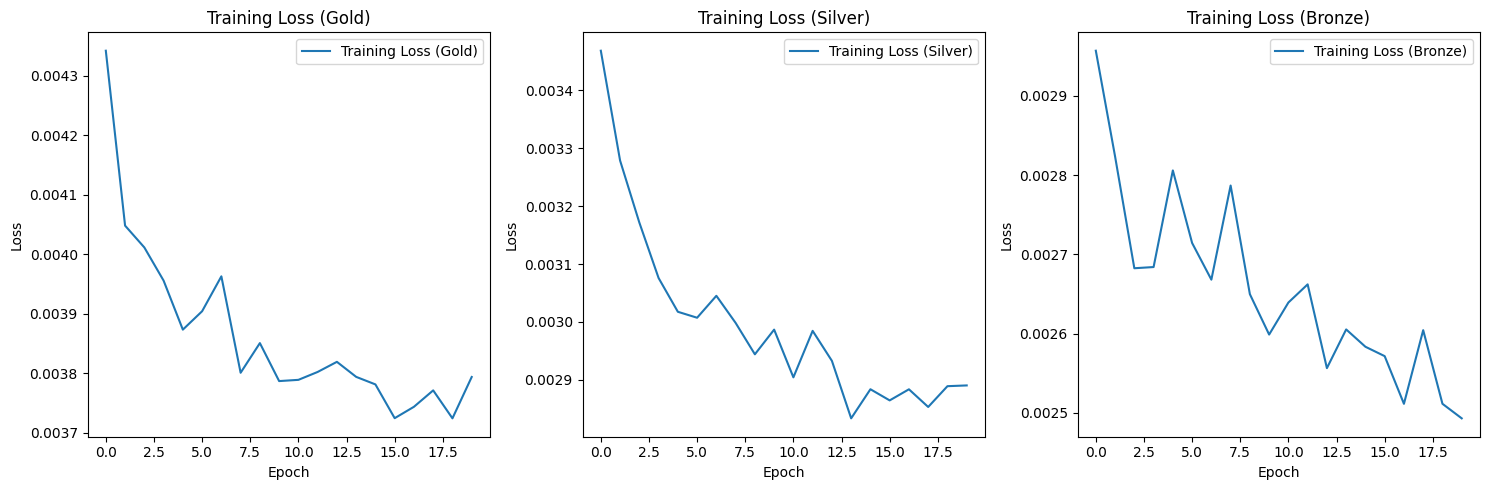

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_gold.history['loss'], label='Training Loss (Gold)')
plt.title('Training Loss (Gold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_silver.history['loss'], label='Training Loss (Silver)')
plt.title('Training Loss (Silver)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_bronze.history['loss'], label='Training Loss (Bronze)')
plt.title('Training Loss (Bronze)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

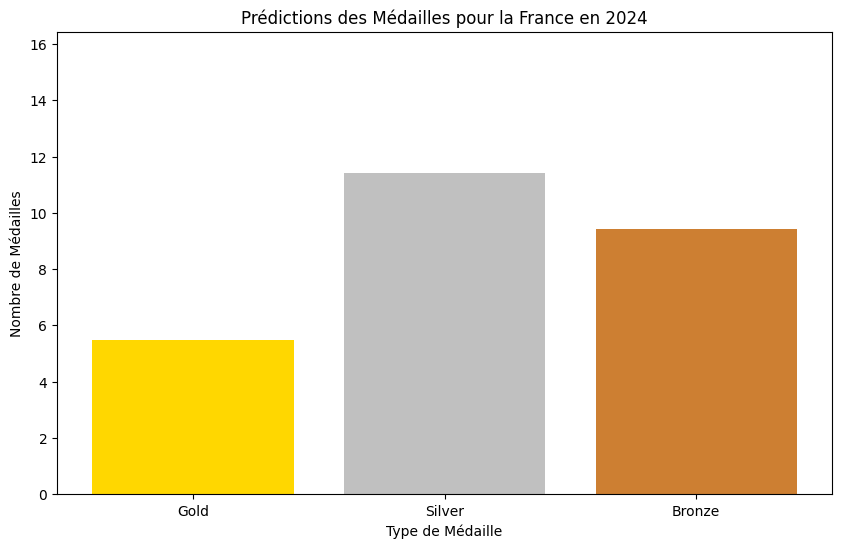

In [49]:
medals_2024 = {
    'Gold': gold_2024,
    'Silver': silver_2024,
    'Bronze': bronze_2024
}

# Noms des médailles et leurs quantités
medal_types = list(medals_2024.keys())
medal_counts = list(medals_2024.values())

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(medal_types, medal_counts, color=['gold', 'silver', '#cd7f32'])
plt.xlabel('Type de Médaille')
plt.ylabel('Nombre de Médailles')
plt.title('Prédictions des Médailles pour la France en 2024')
plt.ylim(0, max(medal_counts) + 5)  # Ajouter un peu d'espace au-dessus des barres
plt.show()

In [51]:
model_gold_loaded = model_gold.save('model_gold_France.h5')
model_silver_loaded = model_silver.save('model_silver_France.h5')
model_bronze_loaded = model_bronze.save('model_bronze_France.h5')